## 1. Importação das Bibliotecas

In [1]:
#!pip install rouge

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from rouge import Rouge
import seaborn as sns

## 2. Importação dos sumários gerados automaticamente

In [3]:
dt_sumarios = pd.DataFrame()

# Leitura do arquivo JSON com os sumários gerados pelos algoritmos
dt_frequencia = pd.read_json("algoritmo_frequencia.json")
dt_luhn = pd.read_json("algoritmo_luhn.json")
dt_cosseno = pd.read_json("algoritmo_cosseno.json")

dt_sumarios = dt_frequencia[['sumario', 'sumario_frequencia']]
dt_sumarios.insert(2,'sumario_luhn', dt_luhn['sumario_luhn'], True)
dt_sumarios.insert(3,'sumario_cosine', dt_cosseno['sumario_cosine'], True)

display(dt_sumarios)

,sumario,sumario_frequencia,sumario_luhn,sumario_cosine
0,The Administration of Union Territory Daman an...,The Daman and Diu administration on Wednesday...,The Daman and Diu administration on Wednesday...,The Daman and Diu administration on Wednesday...
1,Malaika Arora slammed an Instagram user who tr...,"From her special numbers to TVappearances, Bo...","From her special numbers to TVappearances, Bo...","On Wednesday, Malaika Arora shared a gorgeous..."
2,The Indira Gandhi Institute of Medical Science...,The Indira Gandhi Institute of Medical Scienc...,The Indira Gandhi Institute of Medical Scienc...,The Indira Gandhi Institute of Medical Scienc...
3,Lashkar-e-Taiba's Kashmir commander Abu Dujana...,Lashkar-e-Taiba's Kashmir commander Abu Dujan...,Lashkar-e-Taiba's Kashmir commander Abu Dujan...,"Dujana, who had managed to give the security ..."
4,Hotels in Maharashtra will train their staff t...,Hotels in Mumbai and other Indian cities are ...,Hotels in Mumbai and other Indian cities are ...,Awsarmmel said hotels would be told about 50 ...
...,...,...,...,...
3960,Fruit juice concentrate maker Rasna is eyeing ...,"Mumbai, Feb 23 (PTI) Fruit juice concentrate ...","Mumbai, Feb 23 (PTI) Fruit juice concentrate ...",We are looking at Rs 250 crore from this cate...
3961,Former Indian cricketer Sachin Tendulkar atten...,Former cricketer Sachin Tendulkar was spotted...,Former cricketer Sachin Tendulkar was spotted...,Former cricketer Sachin Tendulkar was spotted...
3962,"Aamir Khan, while talking about reality shows ...","Aamir Khan, whose last film Dangal told the s...","Aamir Khan, whose last film Dangal told the s...","Aamir Khan, whose last film Dangal told the s..."
3963,The Maharashtra government has initiated an in...,Maharahstra Power Minister Chandrashekhar Baw...,Maharahstra Power Minister Chandrashekhar Baw...,Maharahstra Power Minister Chandrashekhar Baw...


## 3. Métricas Rouge - Algoritmo de Frequência

In [4]:
metricas_rouge = []

for i in range(len(dt_sumarios)):
    sumario_original = dt_sumarios.iloc[i, 0]
    sumario_frequencia = dt_sumarios.iloc[i, 1]
    rouge = Rouge()
    
    scores = rouge.get_scores(sumario_frequencia, sumario_original)
    
    r1 = scores[0]['rouge-1']
    r2 = scores[0]['rouge-2']
    rl = scores[0]['rouge-l']
    
    metricas_rouge.append({'R1 (R)': r1['r'], 'R1 (P)': r1['p'], 'R1 (F)': r1['f'], 
                           'R2 (R)': r2['r'], 'R2 (P)': r2['p'], 'R2 (F)': r2['f'], 
                           'RL (R)': rl['r'], 'RL (P)': rl['p'], 'RL (F)': rl['f']})

df_rouge_frequencia = pd.DataFrame(metricas_rouge)
display(df_rouge_frequencia)

,R1 (R),R1 (P),R1 (F),R2 (R),R2 (P),R2 (F),RL (R),RL (P),RL (F)
0,0.551020,0.262136,0.355263,0.233333,0.100000,0.140000,0.489796,0.233010,0.315789
1,0.339286,0.141791,0.200000,0.096774,0.032787,0.048980,0.339286,0.141791,0.200000
2,0.321429,0.246575,0.279070,0.183333,0.126437,0.149660,0.321429,0.246575,0.279070
3,0.258621,0.164835,0.201342,0.100000,0.048387,0.065217,0.241379,0.153846,0.187919
4,0.641509,0.323810,0.430380,0.322034,0.141791,0.196891,0.603774,0.304762,0.405063
...,...,...,...,...,...,...,...,...,...
3960,0.442308,0.560976,0.494624,0.327586,0.380000,0.351852,0.423077,0.536585,0.473118
3961,0.434783,0.357143,0.392157,0.210526,0.196721,0.203390,0.413043,0.339286,0.372549
3962,0.392157,0.137931,0.204082,0.049180,0.013158,0.020761,0.333333,0.117241,0.173469
3963,0.355556,0.210526,0.264463,0.068966,0.044444,0.054054,0.266667,0.157895,0.198347


In [5]:
df_rouge_frequencia.to_excel("rouge_frequencia.xlsx")

### 3.1. Medidas estatísticas básicas das métricas Rouge

In [6]:
df_rouge_frequencia.describe()

,R1 (R),R1 (P),R1 (F),R2 (R),R2 (P),R2 (F),RL (R),RL (P),RL (F)
count,3965.000000,3965.000000,3965.000000,3965.000000,3965.000000,3965.000000,3965.000000,3965.000000,3965.000000
mean,0.462300,0.290955,0.342748,0.211260,0.125173,0.149029,0.414030,0.260372,0.306729
std,0.144428,0.126881,0.117730,0.145198,0.106052,0.110655,0.145794,0.123259,0.117513
min,0.041667,0.028986,0.051836,0.000000,0.000000,0.000000,0.021277,0.024242,0.023810
25%,0.361702,0.200000,0.260000,0.100000,0.048544,0.063830,0.307692,0.172414,0.219780
50%,0.460000,0.273973,0.333333,0.186441,0.097087,0.124224,0.407407,0.240000,0.294118
75%,0.557692,0.361702,0.418182,0.300000,0.172840,0.211864,0.509804,0.326531,0.380165
max,0.940000,0.892857,0.844444,0.833333,0.789474,0.709677,0.920000,0.861111,0.823529


### 3.2. Gráficos de distribuição de frequências

Text(0.5, 0, '')

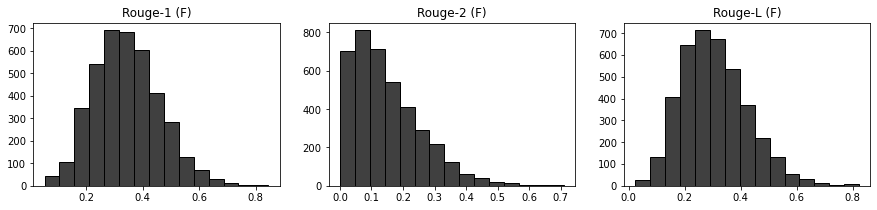

In [7]:
plt.figure(figsize=(15, 3))

plt.subplot(1, 3, 1)
sns.histplot(df_rouge_frequencia['R1 (F)'], color='black', bins=15);
plt.title('Rouge-1 (F)')
plt.ylabel('')
plt.xlabel('')

plt.subplot(1, 3, 2)
sns.histplot(df_rouge_frequencia['R2 (F)'], color='black', bins=15);
plt.title('Rouge-2 (F)')
plt.ylabel('')
plt.xlabel('')

plt.subplot(1, 3, 3)
sns.histplot(df_rouge_frequencia['RL (F)'], color='black', bins=15);
plt.title('Rouge-L (F)')
plt.ylabel('')
plt.xlabel('')

## 4. Métricas Rouge - Algoritmo de Luhn

In [8]:
metricas_rouge = []

for i in range(len(dt_sumarios)):
    sumario_original = dt_sumarios.iloc[i, 0]
    sumario_luhn = dt_sumarios.iloc[i, 2]
    rouge = Rouge()
    
    scores = rouge.get_scores(sumario_luhn, sumario_original)
    
    r1 = scores[0]['rouge-1']
    r2 = scores[0]['rouge-2']
    rl = scores[0]['rouge-l']
    
    metricas_rouge.append({'R1 (R)': r1['r'], 'R1 (P)': r1['p'], 'R1 (F)': r1['f'], 
                           'R2 (R)': r2['r'], 'R2 (P)': r2['p'], 'R2 (F)': r2['f'], 
                           'RL (R)': rl['r'], 'RL (P)': rl['p'], 'RL (F)': rl['f']})

df_rouge_luhn = pd.DataFrame(metricas_rouge)
display(df_rouge_luhn)

,R1 (R),R1 (P),R1 (F),R2 (R),R2 (P),R2 (F),RL (R),RL (P),RL (F)
0,0.734694,0.400000,0.517986,0.450000,0.214286,0.290323,0.693878,0.377778,0.489209
1,0.392857,0.244444,0.301370,0.161290,0.081967,0.108696,0.375000,0.233333,0.287671
2,0.375000,0.328125,0.350000,0.233333,0.181818,0.204380,0.357143,0.312500,0.333333
3,0.293103,0.202381,0.239437,0.100000,0.050000,0.066667,0.275862,0.190476,0.225352
4,0.641509,0.350515,0.453333,0.305085,0.141732,0.193548,0.603774,0.329897,0.426667
...,...,...,...,...,...,...,...,...,...
3960,0.480769,0.581395,0.526316,0.327586,0.395833,0.358491,0.461538,0.558140,0.505263
3961,0.434783,0.512821,0.470588,0.210526,0.235294,0.222222,0.413043,0.487179,0.447059
3962,0.313725,0.145455,0.198758,0.032787,0.013889,0.019512,0.294118,0.136364,0.186335
3963,0.355556,0.347826,0.351648,0.155172,0.166667,0.160714,0.311111,0.304348,0.307692


In [9]:
df_rouge_luhn.to_excel("rouge_luhn.xlsx")

### 4.1. Medidas estatísticas básicas das métricas Rouge

In [10]:
df_rouge_luhn.describe()

,R1 (R),R1 (P),R1 (F),R2 (R),R2 (P),R2 (F),RL (R),RL (P),RL (F)
count,3965.000000,3965.000000,3965.000000,3965.000000,3965.000000,3965.000000,3965.000000,3965.000000,3965.000000
mean,0.452193,0.350229,0.378337,0.215680,0.161745,0.175129,0.407988,0.316224,0.341500
std,0.150495,0.144239,0.126067,0.147990,0.127420,0.123485,0.149699,0.141135,0.126564
min,0.043478,0.031915,0.042254,0.000000,0.000000,0.000000,0.040816,0.021277,0.028169
25%,0.346939,0.246914,0.287879,0.101695,0.067308,0.079208,0.300000,0.213333,0.248276
50%,0.448980,0.333333,0.372881,0.188679,0.131313,0.150376,0.400000,0.293103,0.330435
75%,0.555556,0.439394,0.463768,0.305085,0.225806,0.245614,0.509804,0.400000,0.423729
max,0.962264,0.942857,0.846154,0.913793,0.777778,0.758065,0.962264,0.914286,0.846154


### 4.2. Gráficos de distribuição de frequências

Text(0.5, 0, '')

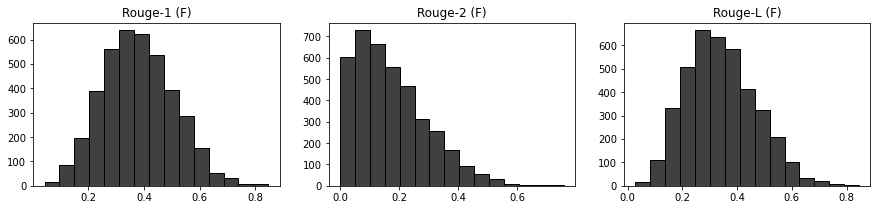

In [11]:
plt.figure(figsize=(15, 3))

plt.subplot(1, 3, 1)
sns.histplot(df_rouge_luhn['R1 (F)'], color='black', bins=15);
plt.title('Rouge-1 (F)')
plt.ylabel('')
plt.xlabel('')

plt.subplot(1, 3, 2)
sns.histplot(df_rouge_luhn['R2 (F)'], color='black', bins=15);
plt.title('Rouge-2 (F)')
plt.ylabel('')
plt.xlabel('')

plt.subplot(1, 3, 3)
sns.histplot(df_rouge_luhn['RL (F)'], color='black', bins=15);
plt.title('Rouge-L (F)')
plt.ylabel('')
plt.xlabel('')

## 5. Métricas Rouge - Algoritmo de Cosseno

In [12]:
metricas_rouge = []

for i in range(len(dt_sumarios)):
    sumario_original = dt_sumarios.iloc[i, 0]
    sumario_cosine = dt_sumarios.iloc[i, 3]
    rouge = Rouge()
    
    scores = rouge.get_scores(sumario_cosine, sumario_original)
    
    r1 = scores[0]['rouge-1']
    r2 = scores[0]['rouge-2']
    rl = scores[0]['rouge-l']
    
    metricas_rouge.append({'R1 (R)': r1['r'], 'R1 (P)': r1['p'], 'R1 (F)': r1['f'], 
                           'R2 (R)': r2['r'], 'R2 (P)': r2['p'], 'R2 (F)': r2['f'], 
                           'RL (R)': rl['r'], 'RL (P)': rl['p'], 'RL (F)': rl['f']})

df_rouge_cosine = pd.DataFrame(metricas_rouge)
display(df_rouge_cosine)

,R1 (R),R1 (P),R1 (F),R2 (R),R2 (P),R2 (F),RL (R),RL (P),RL (F)
0,0.571429,0.350000,0.434109,0.266667,0.156863,0.197531,0.551020,0.337500,0.418605
1,0.285714,0.158416,0.203822,0.096774,0.043478,0.060000,0.267857,0.148515,0.191083
2,0.339286,0.322034,0.330435,0.183333,0.161765,0.171875,0.339286,0.322034,0.330435
3,0.189655,0.139241,0.160584,0.033333,0.020619,0.025478,0.172414,0.126582,0.145985
4,0.301887,0.253968,0.275862,0.033898,0.024096,0.028169,0.264151,0.222222,0.241379
...,...,...,...,...,...,...,...,...,...
3960,0.326923,0.404762,0.361702,0.103448,0.125000,0.113208,0.269231,0.333333,0.297872
3961,0.434783,0.512821,0.470588,0.210526,0.235294,0.222222,0.413043,0.487179,0.447059
3962,0.333333,0.141667,0.198830,0.016393,0.005348,0.008065,0.294118,0.125000,0.175439
3963,0.444444,0.303030,0.360360,0.155172,0.108434,0.127660,0.355556,0.242424,0.288288


In [13]:
df_rouge_cosine.to_excel("rouge_cosseno.xlsx")

### 5.1. Medidas estatísticas básicas das métricas Rouge

In [14]:
df_rouge_cosine.describe()

,R1 (R),R1 (P),R1 (F),R2 (R),R2 (P),R2 (F),RL (R),RL (P),RL (F)
count,3965.000000,3965.000000,3965.000000,3965.000000,3965.000000,3965.000000,3965.000000,3965.000000,3965.000000
mean,0.419256,0.331369,0.353202,0.189100,0.140945,0.152201,0.376369,0.297480,0.316980
std,0.150169,0.140204,0.123547,0.141659,0.120649,0.117341,0.148157,0.136448,0.122860
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.311111,0.229508,0.265060,0.079365,0.051471,0.061538,0.265306,0.196581,0.225000
50%,0.411765,0.314815,0.342857,0.157895,0.109091,0.125000,0.361702,0.275362,0.302521
75%,0.520000,0.414286,0.432836,0.271186,0.196581,0.218487,0.476190,0.375000,0.394737
max,0.962264,0.920000,0.835165,0.913793,0.857143,0.757143,0.962264,0.880000,0.829268


### 5.2. Gráficos de distribuição de frequências

Text(0.5, 0, '')

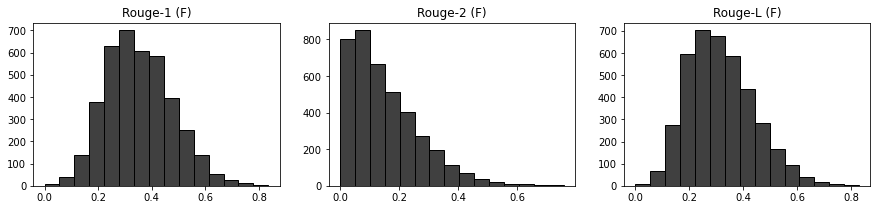

In [15]:
plt.figure(figsize=(15, 3))

plt.subplot(1, 3, 1)
sns.histplot(df_rouge_cosine['R1 (F)'], color='black', bins=15);
plt.title('Rouge-1 (F)')
plt.ylabel('')
plt.xlabel('')

plt.subplot(1, 3, 2)
sns.histplot(df_rouge_cosine['R2 (F)'], color='black', bins=15);
plt.title('Rouge-2 (F)')
plt.ylabel('')
plt.xlabel('')

plt.subplot(1, 3, 3)
sns.histplot(df_rouge_cosine['RL (F)'], color='black', bins=15);
plt.title('Rouge-L (F)')
plt.ylabel('')
plt.xlabel('')